In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0Fw-_JcdllYmxkCVrMpvgAh9zH8DcNKuOyxhfth9hGFa',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibm-donotdelete-pr-2lfc3hi4ysqpvq'
object_key = 'Enhanced_Mining_dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,date,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
0,2017-03-10 01:00:00,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
1,2017-03-10 01:00:00,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2,2017-03-10 01:00:00,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
3,2017-03-10 01:00:00,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
4,2017-03-10 01:00:00,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31


In [2]:
data=data.drop(columns=["date"])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346475 entries, 0 to 346474
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   avg_air_flow_267      346475 non-null  float64
 1   avg_float_level_47    346475 non-null  float64
 2   % Iron Feed           346475 non-null  float64
 3   Amina Flow            346475 non-null  float64
 4   Ore Pulp pH           346475 non-null  float64
 5   Ore Pulp Density      346475 non-null  float64
 6   % Silica Concentrate  346475 non-null  float64
dtypes: float64(7)
memory usage: 18.5 MB


In [4]:
for cols in data.columns.tolist()[1:]:
    df=data.loc[data[cols]>0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346475 entries, 0 to 346474
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   avg_air_flow_267      346475 non-null  float64
 1   avg_float_level_47    346475 non-null  float64
 2   % Iron Feed           346475 non-null  float64
 3   Amina Flow            346475 non-null  float64
 4   Ore Pulp pH           346475 non-null  float64
 5   Ore Pulp Density      346475 non-null  float64
 6   % Silica Concentrate  346475 non-null  float64
dtypes: float64(7)
memory usage: 21.1 MB


In [6]:
data.describe()

,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
count,346475.000000,346475.000000,346475.000000,346475.000000,346475.000000,346475.000000,346475.000000
mean,287.510395,421.699312,57.263148,503.008602,9.846648,1.694629,2.060390
std,19.247813,64.908753,5.124180,68.070518,0.305524,0.051392,0.878811
min,236.065667,244.894000,46.760000,305.720000,8.993670,1.541890,0.600000
25%,282.396167,360.941000,53.200000,454.100500,9.636070,1.663966,1.370000
50%,297.783000,414.785500,56.650000,511.047000,9.865610,1.701810,1.810000
75%,300.449000,479.116750,64.030000,553.664000,10.072000,1.731100,2.550000
max,342.104333,596.743500,65.780000,670.561000,10.541604,1.818810,4.577587


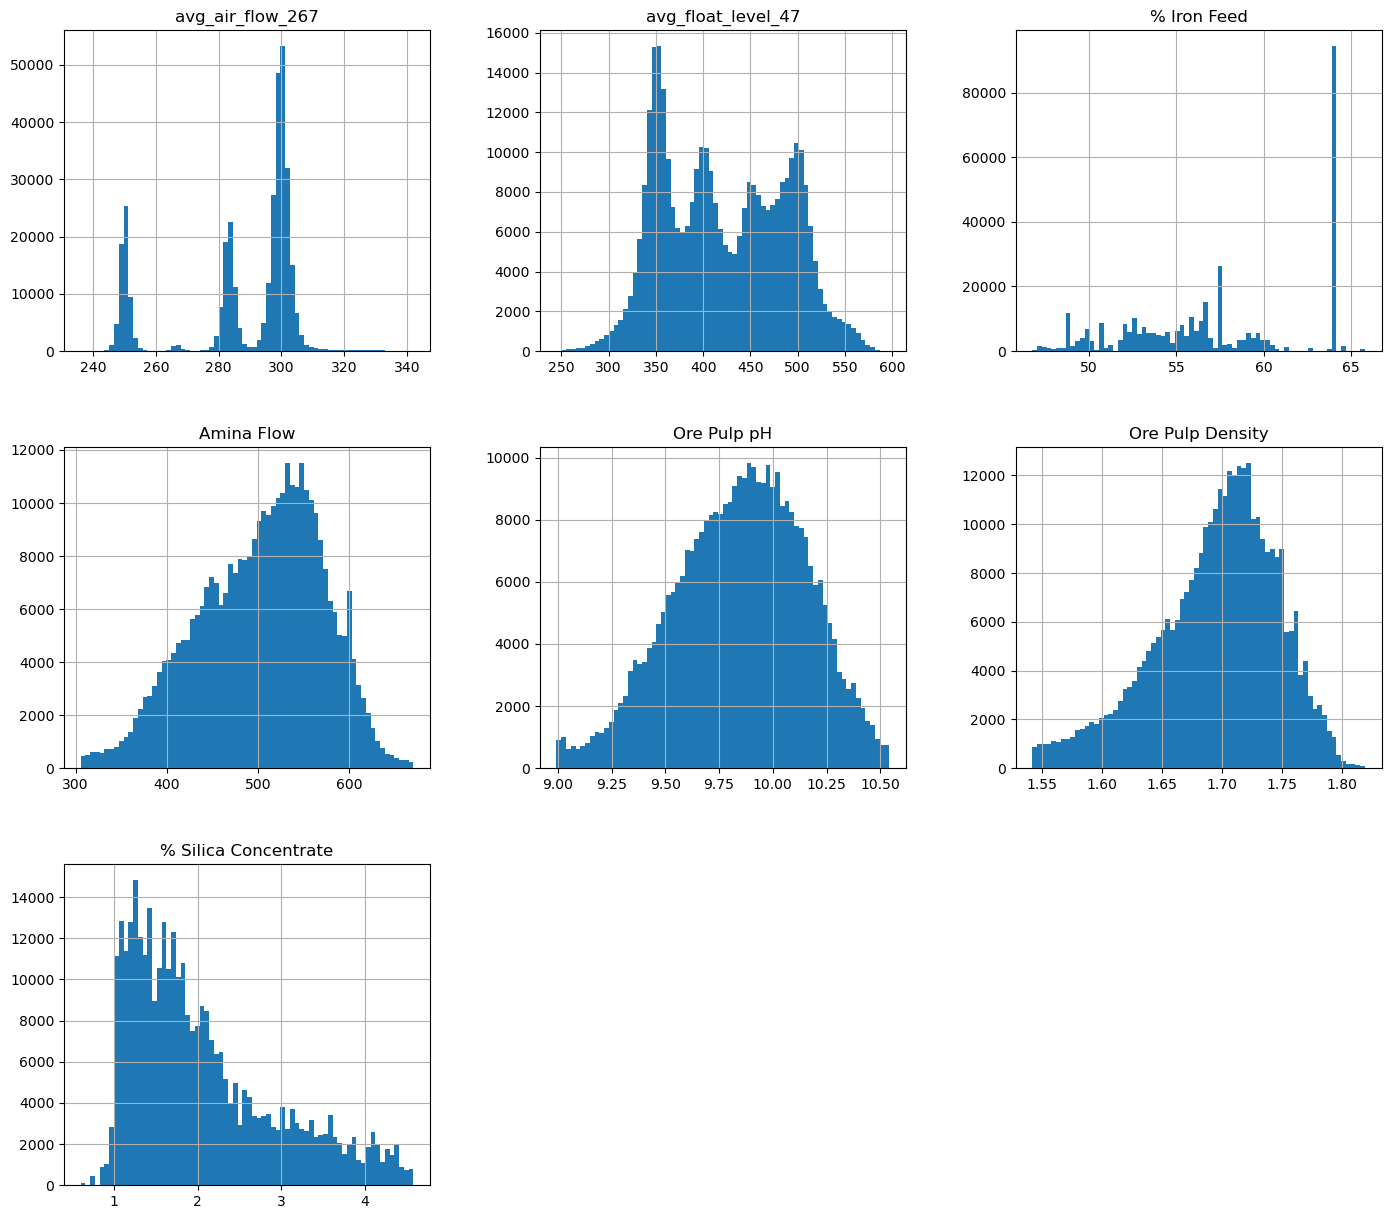

Text(0.5, 0.98, 'figure title')

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

In [8]:
data.isnull()

,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
346470,False,False,False,False,False,False,False
346471,False,False,False,False,False,False,False
346472,False,False,False,False,False,False,False
346473,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

avg_air_flow_267        0
avg_float_level_47      0
% Iron Feed             0
Amina Flow              0
Ore Pulp pH             0
Ore Pulp Density        0
% Silica Concentrate    0
dtype: int64

In [10]:
data.head(10)


,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
0,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
1,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
3,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
4,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31
5,250.378333,432.6890,55.2,564.697,10.0705,1.74,1.31
6,252.209667,431.2895,55.2,566.467,10.0713,1.74,1.31
7,252.143667,445.8730,55.2,558.777,10.0722,1.74,1.31
8,250.188333,455.4945,55.2,556.030,10.0730,1.74,1.31
9,249.616667,456.4875,55.2,565.857,10.0738,1.74,1.31


array([[<AxesSubplot:title={'center':'avg_air_flow_267'}>,
        <AxesSubplot:title={'center':'avg_float_level_47'}>,
        <AxesSubplot:title={'center':'% Iron Feed'}>],
       [<AxesSubplot:title={'center':'Amina Flow'}>,
        <AxesSubplot:title={'center':'Ore Pulp pH'}>,
        <AxesSubplot:title={'center':'Ore Pulp Density'}>],
       [<AxesSubplot:title={'center':'% Silica Concentrate'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

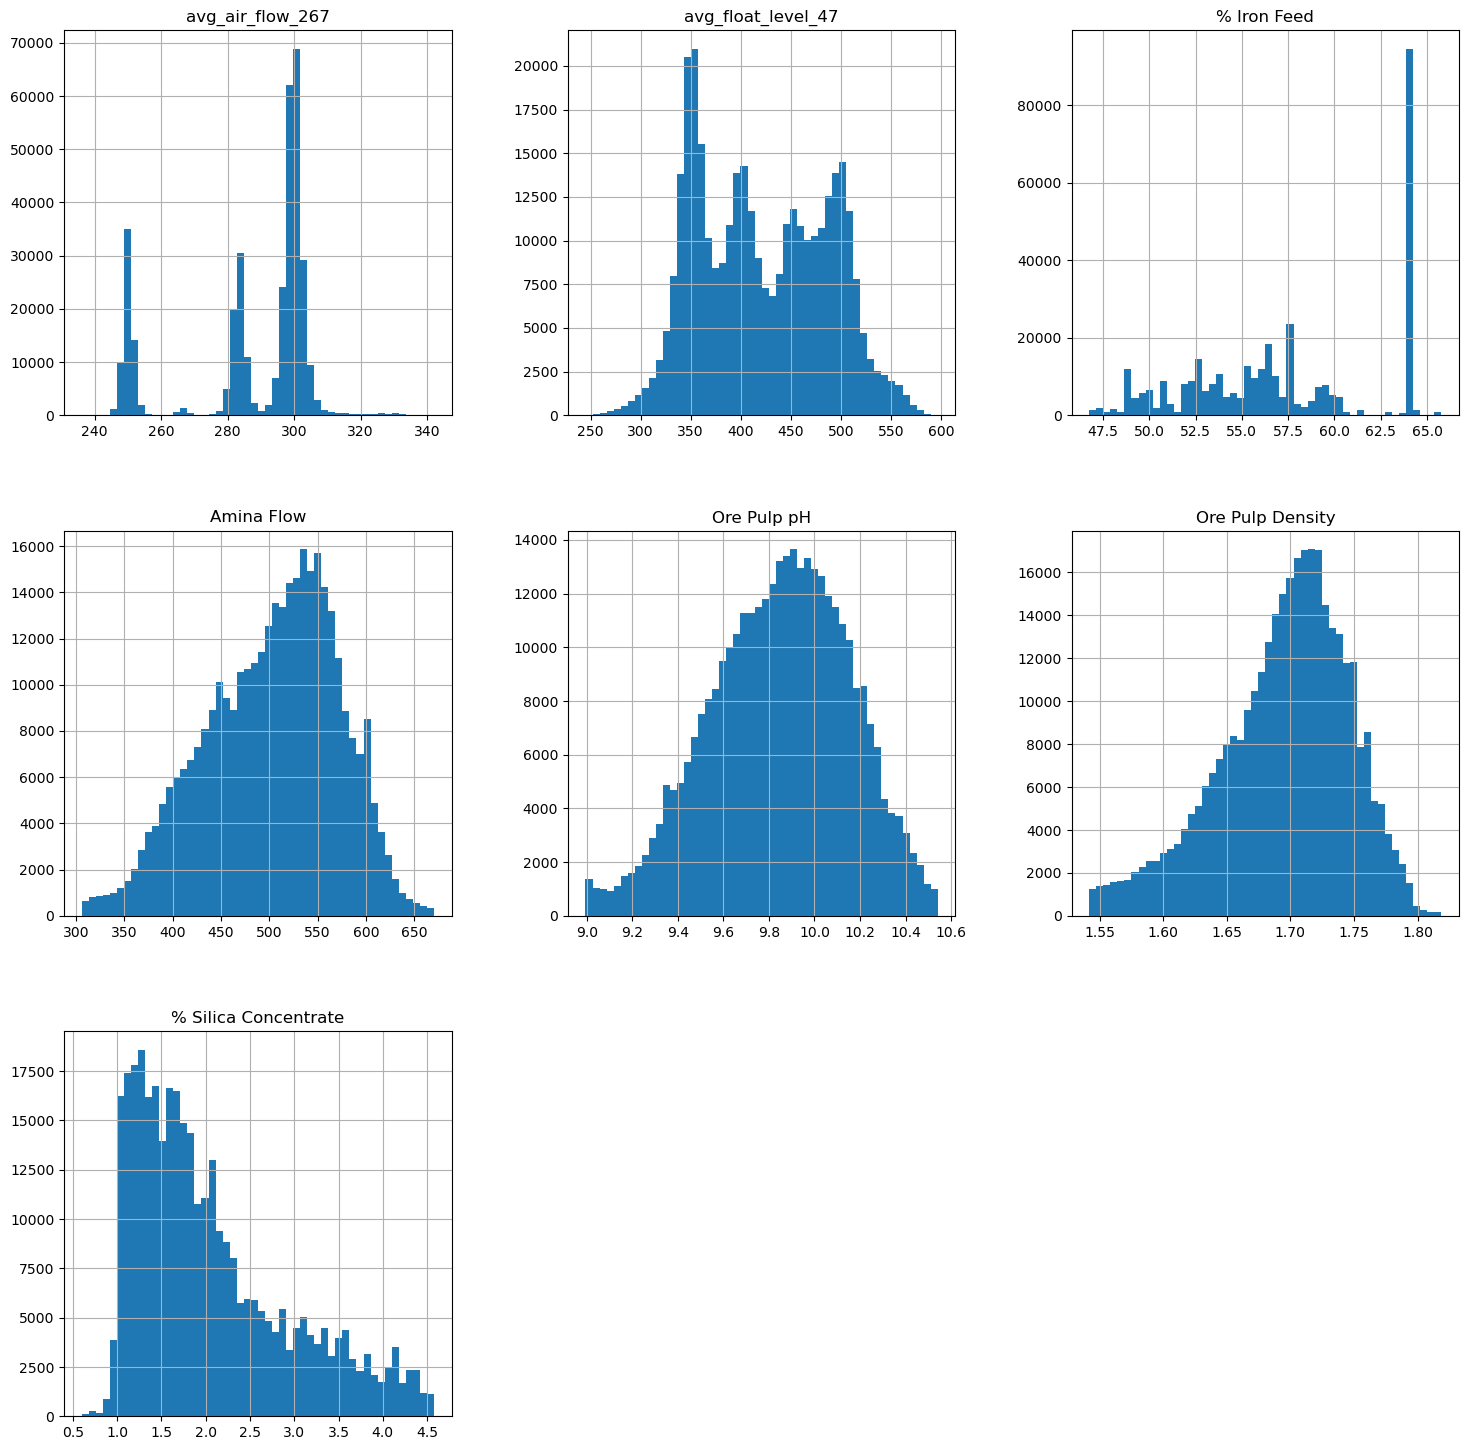

In [11]:
data.hist(bins=50,figsize=(18,18))

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [14]:
X_train

array([[303.04766667, 449.704     ,  49.85      , 557.714     ,
          9.89813   ,   1.67719   ],
       [267.64933333, 547.582     ,  48.81      , 383.206     ,
         10.225     ,   1.70944   ],
       [301.698     , 343.0845    ,  47.05      , 434.788     ,
         10.3392    ,   1.68191   ],
       ...,
       [284.334     , 329.078     ,  52.61      , 514.196     ,
          9.70472   ,   1.69846   ],
       [305.934     , 495.9195    ,  57.47      , 503.149     ,
         10.1694    ,   1.66212   ],
       [298.89833333, 454.856     ,  54.63      , 581.829     ,
          9.78383   ,   1.64188   ]])

In [15]:
X_test

array([[299.949     , 501.8105    ,  64.03      , 419.018     ,
          9.85956   ,   1.72714   ],
       [301.46833333, 482.6445    ,  53.79      , 537.114     ,
          9.70503   ,   1.73242   ],
       [284.24233333, 350.8785    ,  56.65      , 439.317     ,
         10.0146    ,   1.62641   ],
       ...,
       [282.95666667, 336.052     ,  56.65      , 532.266     ,
         10.0442    ,   1.73352   ],
       [296.01433333, 396.1225    ,  49.69      , 563.09      ,
          9.28619   ,   1.74464   ],
       [248.96833333, 508.014     ,  58.54      , 538.483     ,
          9.51999   ,   1.71543   ]])

In [16]:
y_train

array([3.14, 1.88, 1.23, ..., 3.77, 1.14, 2.3 ])

In [17]:
y_test

array([1.  , 1.  , 2.37, ..., 3.48, 1.33, 1.41])

In [18]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor(n_estimators=10,random_state=0)
reg_rf.fit(X_train,y_train)
y_pred=reg_rf.predict(X_test)

In [19]:
import pickle 
pickle.dump(reg_rf,open('reg_rf.pkl','wb'))

In [20]:
!tar -zcvf quality_prediction.tgz reg_rf.pkl

reg_rf.pkl


In [21]:
!pip install ibm_watson_machine_learning

In [22]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"zREBghloyhF7orPL33XUcU6ixLP--pra34YrfZ4NeM73"
                }
client=APIClient(wml_credentials)

In [23]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [24]:
space_uid = guid_from_space_name(client,'models')
print("Space UID="+space_uid)

Space UID=eb6f8396-8d86-42e2-86cf-38ec0f088e11


In [25]:
client.set.default_space(space_uid)

'SUCCESS'

In [26]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [27]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [28]:
model_details = client.repository.store_model(model='quality_prediction.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"qualityprediction",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=X_train,
                                              training_target=y_train)

In [29]:
model_id = client.repository.get_model_id(model_details)
model_id

'6a0dfce0-6229-4a9f-9017-5d46191026e2'

In [36]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2023-02-04T14:58:06.904Z',
  'id': '6a0dfce0-6229-4a9f-9017-5d46191026e2',
  'modified_at': '2023-02-04T14:58:11.371Z',
  'name': 'qualityprediction',
  'owner': 'IBMid-668000LJHL',
  'resource_key': 'd6f33048-927e-4a54-9f7a-26de2e6c4278',
  'space_id': 'eb6f8396-8d86-42e2-86cf-38ec0f088e11'},
 'system': {'warnings': []}}

In [33]:
import numpy as np
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.11815908673599426
MSE: 0.07343256207571833
RMSE: 0.2709844314268226


In [34]:
metrics.r2_score(y_test,y_pred)

0.9047745510761016

In [35]:
import pickle
pickle.dump(reg_rf,open('mining.pkl','wb'))